In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
from datetime import datetime

In [2]:
import platform
print("Python version:", platform.python_version())

Python version: 3.7.4


In [8]:
def printb(string):
    print('\033[1m'+string+'\033[0m')
import warnings
warnings.filterwarnings('ignore')

# Question 1: Load

# Programmatically download and load into your favorite analytical tool the transactions data. 

In [6]:
# clone data challenge repository via URL
!git clone https://github.com/CapitalOneRecruiting/DS.git

fatal: destination path 'DS' already exists and is not an empty directory.


In [8]:
# read zipped and line-delimited JSON file
# save as pickle for reusage
import json  
import zipfile  

d = None
data = None 
json_lines=[]
with zipfile.ZipFile("DS/transactions.zip", "r") as z:
    for filename in z.namelist():  
        print("Filename is ",filename)  
        with z.open(filename) as f:  
            for line in f:
                j_content = json.loads(line)
                json_lines.append(j_content)

# save json object as dataframe
df_raw = pd.DataFrame(json_lines)   
df_raw.to_pickle('Datachallenge.pkl')

Filename is  transactions.txt


# Please describe the structure of the data. Number of records and fields in each record?

In [4]:
df = pd.read_pickle('Datachallenge.pkl')

In [64]:
printb('Shape of data:')
print(df.shape)
printb('Datatypes of data:')
print(df.dtypes)
printb('Distinct records of each column:')
print(df.nunique())

Shape of data:
(786363, 29)
Datatypes of data:
accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd 

In [5]:
df = df.replace(['','NA','Null','NAN'], np.nan)
printb('NA records of each column:')
print(df.isna().sum())

NA records of each column:
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch    

In [131]:
# check column duplicates since the two columns have same unique records
df[(df['accountNumber']==df['customerId'])!=True]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,weekday


From above, we know:
- The data has 29 features and 786363 records
- Among the 29 features, 3 of them are bool datatype, 4 are float datatype, and the rest are object strings
- Distinct number of records in each feature is printed above
- The dataset is based on 5000 customers, with 10 different credit limits, 4 transaction types, and 19 merchant categories.
- There are 6 columns that doesn't contain any value: 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd' 
- There are 5 columns that contain some NA values: 'acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType'
- The two features: 'accountNumber' and 'customerId' share the same value

# Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [59]:
# describe 4 numeric fields
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


From above, we know:
- The credit limit is between 250 and 50,000 and the mean is around 10,769, indicating the data skewing to the right
- The money available can be negative, which might indicate oweing money. 
- Transaction amount is between 0 to 2012, and the mean is around 137 which also indicates right skewed
- The sum of the mean of both current balance and the available money rounds up to the credit limit
- There seems to be correlation between the 4 numeric features    

# Question 2: Plot

# Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

In [6]:
# drop the 6 columns that doesn't have values
df=df.drop(columns=['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd'])

Text(0.5, 1.0, 'Histogram of Transaction Amounts')

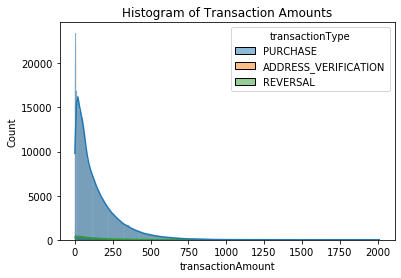

In [18]:
sns.histplot(df,x='transactionAmount',hue= 'transactionType', kde=True)
plt.title('Histogram of Transaction Amounts')

From above, the plot confirmed that the transaction amount is right skewed, the majority transaction amount is under 250. Majority of the transaction type is 'purchase', and the rest is 'reversal. 'address_verification' does not have transaction amount.

# Report any structure you find and any hypotheses you have about that structure.

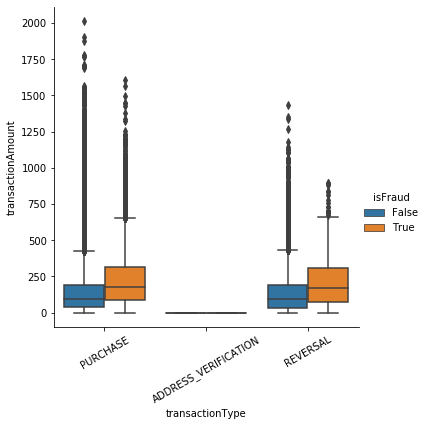

In [37]:
df1 = df.dropna(subset=['transactionType'])
g=sns.catplot(x="transactionType", y="transactionAmount", hue="isFraud", kind="box", data=df1)
g.set_xticklabels(rotation=30)

- From above we see that the mean of the 'purchase' amount is close to the 'reversal' amount, both are heavily right skewed and the span of 'reversal' amount is smaller. 
- The 'address_verification' transactions have no transaction amount.
- Also, the mean of transaction amount for transactions identified as fraud is higher than non-fraud, but the highest values of fraud transactions are smaller than non-fraud.

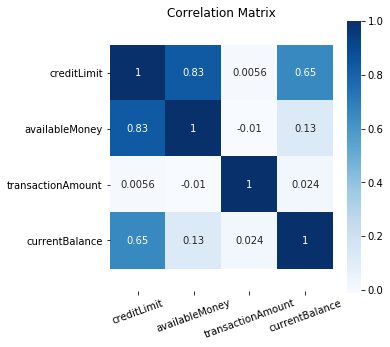

In [88]:
# plot correlation of the 4 numeric fields
df_numeric = df[['creditLimit','availableMoney','transactionAmount','currentBalance']]
corr = df_numeric.corr()
corr
fig, ax = plt.subplots(figsize=(5,5))
heatmap = sns.heatmap(corr,cmap='Blues',square=True,annot=True)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=20, fontsize=10)

plt.title('Correlation Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.9, top - 0.9)
plt.show()

From above, we see strong positive correlation between availableMoney and creditLimit. Also pretty decent positive correlation between currentBalance and creditLimit. But the transaction amount is not affected by creditLimit.

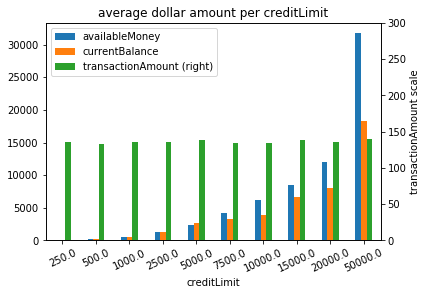

In [94]:
df2 = df.groupby('creditLimit')['availableMoney','currentBalance','transactionAmount'].mean().reset_index()
#plt.figure()
ax = df2.plot(x='creditLimit',secondary_y=['transactionAmount'],kind='bar')
ax.right_ax.set_ylim(0,300)
ax.right_ax.set_ylabel('transactionAmount scale')
ax.set_xticklabels(df2['creditLimit'], rotation = 25)
ax.set_title('average dollar amount per creditLimit')
plt.show()

- From above, we see the positive correlation between credit limit and both the mean of availableMoney and mean of currentBalance. However, the avg transaction amount stays in the same level around 150. 
- Also, the sum of availableMoney and currentBalance can almost round up to the creditLimit.

# Question 3: Data Wrangling - Duplicate Transactions

Before answering the questions, we do some prelim data processing.

1. convert datetime variables to datetime data type

In [7]:
date_feature = ['transactionDateTime','accountOpenDate','currentExpDate','dateOfLastAddressChange']
print(df[date_feature].head())

   transactionDateTime accountOpenDate currentExpDate dateOfLastAddressChange
0  2016-08-13T14:27:32      2015-03-14        06/2023              2015-03-14
1  2016-10-11T05:05:54      2015-03-14        02/2024              2015-03-14
2  2016-11-08T09:18:39      2015-03-14        08/2025              2015-03-14
3  2016-12-10T02:14:50      2015-03-14        08/2025              2015-03-14
4  2016-03-24T21:04:46      2015-08-06        10/2029              2015-08-06


In [8]:
df['transactionDateTime']=pd.to_datetime(df['transactionDateTime'],format='%Y-%m-%dT%H:%M:%S')
df['accountOpenDate']=pd.to_datetime(df['accountOpenDate'],format='%Y-%m-%d')
df['currentExpDate']=pd.to_datetime(df['currentExpDate'],format='%m/%Y')
df['dateOfLastAddressChange']=pd.to_datetime(df['dateOfLastAddressChange'],format='%Y-%m-%d')
print(df.dtypes)
print(df[date_feature].head())

accountNumber                       object
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
dtype: obje

2. fill Nan values

In [9]:
na_column = df.columns[df.isna().any()].tolist()
print(na_column)
print(df[na_column].dtypes)

['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']
acqCountry             object
merchantCountryCode    object
posEntryMode           object
posConditionCode       object
transactionType        object
dtype: object


In [10]:
# since all columns that contain Nan values are object datatype, we will fillna with string
df[na_column]=df[na_column].fillna('NA')

In [11]:
# check counts of transactionType
df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
NA                         698
Name: transactionType, dtype: int64

# To identify reversal: 
    - most simply, we can filter on the transactionType =='REVERSAL', which gives 20303 records. However, there are 698 records that are missing the transactionType, also the type can be coded wrong with human inputs.
    - If there is more time, we could identify the reversal records from the NA types records.
    - save as df_rev

In [398]:
# simply filter on transactionType to identify reversal
df_rev = df[df['transactionType']=='REVERSAL']
print(df_rev.shape)

(20303, 25)


# To identify multi-swipe transactions:
- We can make following assumptions to filter out potential multi-swipe records:
    - the multi-swipe happens within 1 transaction day, within couple of minutes
    - the transaction should have the same merchant, same customer and same credit card 
    - -> same 'merchantName','transactionDate','transactionAmount','customerId','cardLast4Digits'
    - we can filter out the 'REVERSAL' and 'ADDRESS_VERIFICATION'. All 'ADDRESS_VERIFICATION' has 0 transaction amount which should not be multi-swipe.
    - We got 14220 records after above filtering.
- After calculating the timespan of the multi-swipe records filtered from above, which is around 2 minutes, we set the index of the dataframe tobe the transactionDateTime, and we use the Grouper attribute to group the potential records in a 3-minute timespan period. Then we filter out the records that are within the 3-minute timespan. We got 7105 records to be the multi-swipe transactions.
- Save as df_multi
    

In [12]:
# add transactionDate column for grouping transactions
df['transactionDate']=df['transactionDateTime'].dt.date
# filter out all records that share traits of mul-transaction
# Also filter out above records that are multi-transactions within same day
df_group = df[df.groupby(['merchantName','transactionDate','transactionAmount','customerId','cardLast4Digits'])['transactionDateTime'].transform('count') > 1]
df_group = df_group[(df_group['transactionType']!='REVERSAL')&(df_group['transactionType']!='ADDRESS_VERIFICATION')]
df_group = df_group[df_group.groupby(['merchantName','transactionDate','transactionAmount','customerId','cardLast4Digits'])['transactionDateTime'].transform('count') > 1]
df_group

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
262,984504651,984504651,50000.0,26799.51,2016-03-12 06:34:13,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23200.49,True,False,False,2016-03-12
263,984504651,984504651,50000.0,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,2016-03-12
264,984504651,984504651,50000.0,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,2016-03-12
280,984504651,984504651,50000.0,24342.83,2016-03-18 13:56:20,26.71,Planet Fitness #692929,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,25657.17,True,False,False,2016-03-18
281,984504651,984504651,50000.0,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,2016-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785982,205026043,205026043,5000.0,843.53,2016-06-07 22:27:35,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4156.47,False,False,False,2016-06-07
785983,205026043,205026043,5000.0,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4548.41,False,False,False,2016-06-07
785984,205026043,205026043,5000.0,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4566.48,False,False,False,2016-06-07
786232,638498773,638498773,10000.0,3440.16,2016-11-29 23:10:48,390.98,Krispy Kreme #653472,US,US,05,...,2014-11-17,175,175,321,PURCHASE,6559.84,True,False,False,2016-11-29


In [242]:
# Check how many transactions per day in each potential multi-transaction group 
print('Average number of transactions per each potential multi-transaction group:')
print(df_group.groupby(['merchantName','transactionDate','transactionAmount','customerId','cardLast4Digits'])
      ['transactionDateTime'].count().mean())

Average number of transactions per each potential multi-transaction group:
2.1004431314623337


Since on average there are 2 transactions per day for each potential multi-transaction group, we calculate the average time period between the transactions per day per group:

In [250]:
timespan =df_group.groupby(['merchantName','transactionDate','transactionAmount','customerId','cardLast4Digits'])
['transactionDateTime'].transform(lambda x: x.diff().mean())
print('Average timespan between multi transactions:',timespan.mean())

Average timespan between multi transactions: 0 days 00:02:22.568178


Since on average the timespan between multi-swipe transaction is around 2 minutes 22 seconds, we filter out all the records that are between timespan of 3 minutes by using the Grouper function to group transactions

In [13]:
df_multi = df_group.set_index('transactionDateTime')
# use Grouper function to group within 3 minute transaction period
df_multi =df_multi[df_multi.groupby(['merchantName','transactionAmount','customerId','cardLast4Digits',
                                     pd.Grouper(freq='3Min')])['transactionAmount'].transform('count') > 1].reset_index()
df_multi

,transactionDateTime,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
0,2016-03-12 06:34:13,984504651,984504651,50000.0,26799.51,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23200.49,True,False,False,2016-03-12
1,2016-03-12 06:34:29,984504651,984504651,50000.0,26680.99,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,2016-03-12
2,2016-05-07 07:30:02,984504651,984504651,50000.0,7326.14,23.82,Golds Gym #846582,US,US,09,...,2016-05-05,640,640,8332,PURCHASE,42673.86,True,False,False,2016-05-07
3,2016-05-07 07:32:54,984504651,984504651,50000.0,7302.32,23.82,Golds Gym #846582,US,US,09,...,2016-05-05,640,640,8332,PURCHASE,42697.68,True,False,False,2016-05-07
4,2016-06-04 12:13:12,984504651,984504651,50000.0,13324.81,270.10,EZ Putt Putt #40513,US,US,05,...,2016-05-05,640,640,8332,PURCHASE,36675.19,True,False,False,2016-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7100,2016-08-23 18:05:10,841351704,841351704,50000.0,12188.19,392.35,San Francisco Post,US,US,02,...,2015-12-17,651,651,7831,PURCHASE,37811.81,False,False,True,2016-08-23
7101,2016-10-30 20:58:43,428856030,428856030,250.0,239.85,314.07,Rodeway Inn #438868,US,US,02,...,2009-08-17,990,990,7660,PURCHASE,10.15,True,False,False,2016-10-30
7102,2016-10-30 20:59:18,428856030,428856030,250.0,104.44,314.07,Rodeway Inn #438868,US,US,02,...,2009-08-17,990,990,7660,PURCHASE,145.56,True,False,False,2016-10-30
7103,2016-06-07 22:27:35,205026043,205026043,5000.0,843.53,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4156.47,False,False,False,2016-06-07


# What total number of transactions and total dollar amount do you estimate for the reversed transactions? 

In [355]:
count = df_rev['transactionAmount'].count()
total = df_rev['transactionAmount'].sum()
print('Total number of transactions is:',count,'. Total dollar amount is: $',total)

Total number of transactions is: 20303 . Total dollar amount is: $ 2821792.5


# For the multi-swipe transactions?

In [ ]:
def report(df):
    df=df[['transactionDateTime','merchantName','customerId','cardLast4Digits','transactionAmount']]
    df = df.set_index('transactionDateTime')
    df_sum= df.groupby([pd.Grouper(freq='3Min'),'transactionAmount','merchantName','customerId','cardLast4Digits'
                                     ])['transactionAmount'].apply(lambda x: x.iloc[1:].sum()).reset_index(name='sum')
    df_count= df.groupby([pd.Grouper(freq='3Min'),'transactionAmount','merchantName','customerId','cardLast4Digits'
                                     ])['transactionAmount'].apply(lambda x: x.iloc[1:].count()).reset_index(name='count')
    
    print('Total number of transactions is:',df_count['count'].sum(),'. Total dollar amount is: $',df_sum['sum'].sum())

In [346]:
report(df_multi)

Total number of transactions is: 3601 . Total dollar amount is: $ 535516.25


# Did you find anything interesting about either kind of transaction?

Let's define a function to plot and check the mean of transaction amount per merchant category and per country.

In [400]:
def catplot(df,title):    
    g = sns.catplot(x="merchantCategoryCode", y="transactionAmount",
                    hue="isFraud", col = 'merchantCountryCode', col_wrap = 3,sharex=False,
                    data=df, kind="bar")
    g.set_xticklabels(rotation=25)
    g.set_titles(row_template="{row_name}")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(title)
    plt.show()

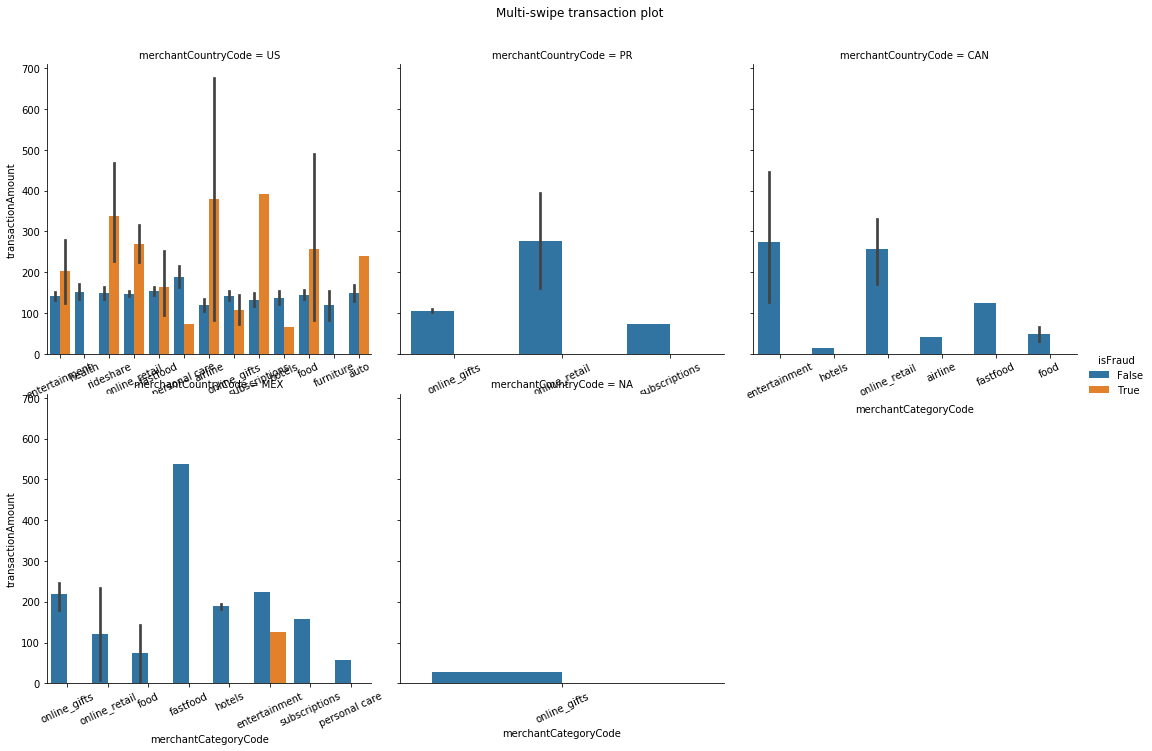

In [394]:
catplot(df_multi,'Multi-swipe transaction plot')

For the multi-swipe transaction:
- From above, we see that in US, in majority of the merchant categories, the average Fraud transaction amount is much higher than the non-fraud, especially in categories of 'rideshare', 'online-retail','airline','subscriptions' and 'food'
- In US, the two cateogries of multi-swipe transactions do not contain fraud: 'health' and 'furniture'
- Most fraud in multi-swipe transactions happen in US, for all other country types, fraud only exists in 'entertainment' category in Mexico.

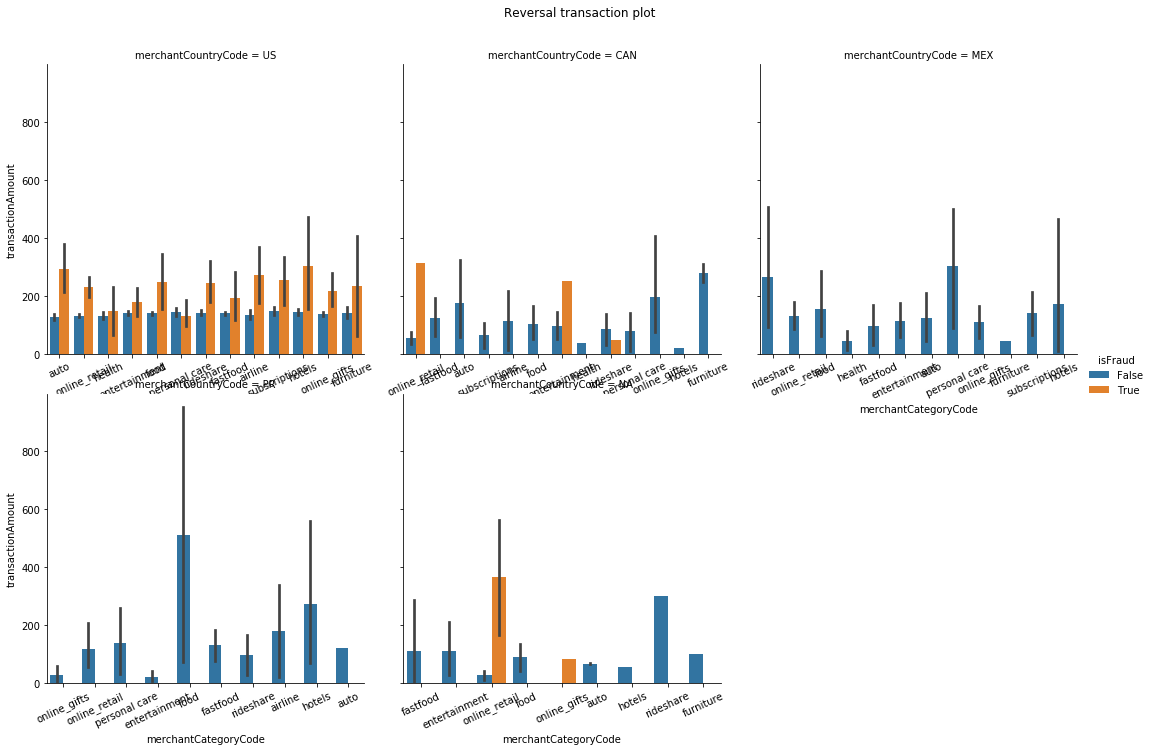

In [401]:
catplot(df_rev,'Reversal transaction plot')

For the reversal transaction:
- In US, most of categories of merchant's reversal transactions, the fraud transaction amount is much higher than non-fraud, except the category of 'personal_care'
- The other countries that have fraud transactions in reversal transactions are Canada, and NA country code
- In Canada, there are high fraud rate among all other reversal transactions in 'online-retail'

# Question 4: Model

In [9]:
# import packages for preprocessing
from sklearn.model_selection import train_test_split #Splitting data for model training
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

#Models
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

#Model evaluation
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import confusion_matrix


Next, we will build a classification model to identify each transaction as fraud or non-fraud. The steps includes feature engineering, modeling, hyperparameter tuning and model evaluation.

In [15]:
# check current df before modeling, and save as pickle file 
df.to_pickle('df_beforeModel.pkl')
df.dtypes

accountNumber                       object
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
transaction

In [16]:
df.shape

(786363, 24)

In [17]:
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

From above, we can see class imbalance for the classification target. The isFraud = True is only about 1.6% of the total. Will do imbalance data imputation when modeling.

## Feature Engineering

In [25]:
df = pd.read_pickle('df_beforeModel.pkl')

In [18]:
# add multi-swipe identifier column
m = df.merge(df_multi,how='outer',indicator='multiSwipe')
df['multiSwipe']= m['multiSwipe']=='both'

In [430]:
# check features by different dtypes
feature_dic = df.columns.to_series().groupby(df.dtypes).groups
feature_dic

{dtype('float64'): Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance'], dtype='object'),
 dtype('<M8[ns]'): Index(['transactionDateTime', 'currentExpDate', 'accountOpenDate',
        'dateOfLastAddressChange'],
       dtype='object'),
 dtype('bool'): Index(['cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'multiSwipe'], dtype='object'),
 dtype('O'): Index(['accountNumber', 'customerId', 'merchantName', 'acqCountry',
        'merchantCountryCode', 'posEntryMode', 'posConditionCode',
        'merchantCategoryCode', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
        'transactionType', 'weekday', 'transactionDate'],
       dtype='object')}

#### Feature engineer for dateTime variables:
- ['transactionDateTime', 'currentExpDate', 'accountOpenDate','dateOfLastAddressChange']

In [19]:
# Engineer for 'transactionDateTime'
df['transactionMonth'] = df['transactionDateTime'].dt.month
df['weekday']=df['transactionDateTime'].dt.weekday
# calculate how many days till card expiration since transaction
df['DaysTillExp'] = (df['currentExpDate']- df['transactionDateTime']).dt.days
# calculate how any days account has opened
df['accountOpenDays'] = (df['transactionDateTime']-df['accountOpenDate']).dt.days
# calculate days between account open and expire
df['accountAvailDays'] = (df['currentExpDate']-df['accountOpenDate']).dt.days
# calculate days since address change till transaction happens
df['LastAddressChangeDays'] = (df['transactionDateTime']-df['dateOfLastAddressChange']).dt.days
# calculate days since account open till address change
df['DaysTillAddressChange'] = (df['dateOfLastAddressChange']-df['accountOpenDate']).dt.days


In [20]:
df.shape

(786363, 32)

In [24]:
# split into input (X) and output (y) variables
# manually exclude some features for input
X_features = list(set(df.columns) - 
                  set(['isFraud','accountNumber','customerId','acqCountry','cardCVV','enteredCVV',
                       'cardLast4Digits','transactionDate','merchantName']))
            # I excluded card related variables (e.g. cardCVV) since the fraud should not be affected by individual credit card numbers
            # Same exclusion reason for customer variables
            # excluded 'posEntryMode','posConditionCode' due to lack of info on the data
            # excluded 'merchantName', since it is already categorized in 'merchantCategoryCode'
            # 23 total features
X = df[X_features]
y = df[['isFraud']]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=50)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (629090, 23) (629090, 1)
Test (157273, 23) (157273, 1)


In [25]:
df['posEntryMode'].unique()

array(['02', '09', '05', '80', '90', 'NA'], dtype=object)

#### Encoding for categorical variables:

In [27]:
# Encoding categorical features and fit the encoding on the training dataset, then apply on train and test

# ordinal encoding for features that can have orders, or binary features
def label_enc(X_train, X_test,cols):
    le = LabelEncoder()    
    X_train_enc = X_train[cols].apply(lambda col: le.fit_transform(col))
    X_test_enc = X_test[cols].apply(lambda col: le.fit_transform(col))
    return X_train_enc, X_test_enc
# dummy encoding for rest of categorical features 
def dummy_enc(X_train, X_test,cols):
    #drops one column from the resulted dummy features to avoid multicollinearity.
    X_train_enc = pd.get_dummies(X_train[cols], prefix_sep='_', drop_first=True) 
    X_test_enc = pd.get_dummies(X_test[cols], prefix_sep='_', drop_first=True) 
    return X_train_enc, X_test_enc

label = ['cardPresent', 'expirationDateKeyInMatch', 'multiSwipe','transactionType']
target = ['isFraud']
dummy = ['merchantCountryCode','merchantCategoryCode','posEntryMode','posConditionCode']

X_train_enc_label, X_test_enc_label = label_enc(X_train, X_test,label)
X_train_enc_dummy, X_test_enc_dummy = dummy_enc(X_train, X_test,dummy)
X_train_enc = pd.concat([X_train_enc_label,X_train_enc_dummy],axis= 1)
X_test_enc = pd.concat([X_test_enc_label,X_test_enc_dummy],axis= 1)

print(dummy)
print(X_train_enc.shape, X_test_enc.shape)

y_train_enc, y_test_enc = label_enc(y_train, y_test,target)
print(y_train_enc.shape, y_test_enc.shape)


['merchantCountryCode', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode']
(629090, 34) (157273, 34)
(629090, 1) (157273, 1)


In [28]:
y_full =  pd.concat([y_train_enc,y_test_enc])
x_full = pd.concat([X_train_enc,X_test_enc])
print(x_full.shape, y_full.shape)

(786363, 34) (786363, 1)


# feature selection

Since encoding has increased our dimension, to reduce dimension for faster computation speed, we conduct feature selection

In [ ]:
# feature selection with Mutual Information statistic for categorical features

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [515]:
# check feature scores
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.031955
Feature 1: 0.000000
Feature 2: 0.000027
Feature 3: 0.020336
Feature 4: 0.134381
Feature 5: 0.000255
Feature 6: 0.000000
Feature 7: 0.001651
Feature 8: 0.003103
Feature 9: 0.001686
Feature 10: 0.000254
Feature 11: 0.000608
Feature 12: 0.000000
Feature 13: 0.000100
Feature 14: 0.000202
Feature 15: 0.000410
Feature 16: 0.000626
Feature 17: 0.001146
Feature 18: 0.010757
Feature 19: 0.000405
Feature 20: 0.000166
Feature 21: 0.000761
Feature 22: 0.000187
Feature 23: 0.000000
Feature 24: 0.000013
Feature 25: 0.000000
Feature 26: 0.144199


There are 5 features that have scores higher than 0.01, the higher the better, so we keep these 5 features as final lists of categorical features. We also include the merchant categories = 'health' and 'personal_care' based on the findings from Question 3. We found that transactions in thoese three category are normally not fraud compared to others where the fraud occurs more than normal.

In [545]:
l = []
cat_features=[]
for i in range(len(fs.scores_)):
    if fs.scores_[i]> 0.01:        
        print('Feature %d: %f' % (i, fs.scores_[i]))
        l.append(i)
for i in l:
        cat_features.append(X_train_enc.columns[i])
cat_features

Feature 0: 0.031955
Feature 3: 0.020336
Feature 4: 0.134381
Feature 18: 0.010757
Feature 26: 0.144199


['cardPresent',
 'weekday',
 'transactionType',
 'merchantCategoryCode_online_retail',
 'merchantCountryCode_US']

In [46]:
cat_features = cat_features + ['merchantCategoryCode_health','merchantCategoryCode_personal care']

In [113]:
# finalize the input X and output y dataframe

num_features = X.columns[(X.dtypes==float)|(X.dtypes==int)].tolist()
X_cat = pd.concat([X_train_enc[cat_features],X_test_enc[cat_features]])
X_model = pd.concat([X_cat,X[num_features]],axis=1) # input X (categorical and float)
y_model = pd.concat([y_train_enc,y_test_enc]) # output y

print(X_model.shape,y_model.shape)

X_model.to_pickle('X_model.pkl')
y_model.to_pickle('y_model.pkl')

(786363, 18) (786363, 1)


# Evaluate multiple baseline models using pipelines

In [41]:
X_model=pd.read_pickle('X_model.pkl')
y_model=pd.read_pickle('y_model.pkl')

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2,stratify=y_model)

['scaledLR']: 0.984209 (0.000284)
['scaledLR', 'scaledMNB']: 0.984207 (0.000282)
['scaledLR', 'scaledMNB', 'scaledKNN']: 0.984182 (0.000289)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT']: 0.967478 (0.000358)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT', 'scaledLDA']: 0.984209 (0.000284)


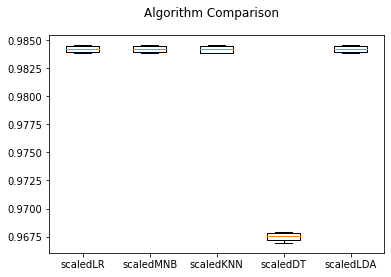

In [5]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledLDA' , (Pipeline([('scaled' , StandardScaler()),('LDA' ,LinearDiscriminantAnalysis())]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=5, random_state=50)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy') # accuracy scores
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

From above, we see very high accuracy score among all classifiers except Decision Tree. However, due to the extremely skewed data and imbalanced class problem, we will check ROC-AUC scores instead of accuracy score. \
Also added two ensemble algorithms, Random Forest and XGboost.

['scaledLR']: 0.506589 (0.004080)
['scaledLR', 'scaledMNB']: 0.505188 (0.005618)
['scaledLR', 'scaledMNB', 'scaledKNN']: 0.496557 (0.001426)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT']: 0.499922 (0.002586)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT', 'scaledLDA']: 0.506523 (0.004053)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT', 'scaledLDA', 'scaledRF']: 0.497833 (0.003347)
['scaledLR', 'scaledMNB', 'scaledKNN', 'scaledDT', 'scaledLDA', 'scaledRF', 'scaledXgb']: 0.502587 (0.003909)


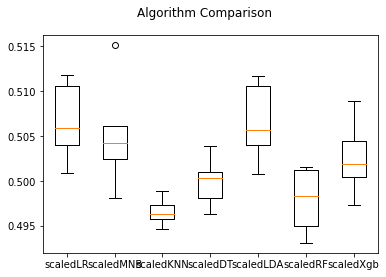

In [42]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledLDA' , (Pipeline([('scaled' , StandardScaler()),('LDA' ,LinearDiscriminantAnalysis())]))))
pipelines.append(('scaledRF' , (Pipeline([('scaled' , StandardScaler()),('RF' ,RandomForestClassifier())]))))
pipelines.append(('scaledXgb' , (Pipeline([('scaled' , StandardScaler()),('Xgb' ,xgboost.XGBClassifier())]))))


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=5, random_state=50)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='roc_auc') # roc_auc scores
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)

plt.show()

From above, we see extremely low AUC scores around 0.5 for all classifiers. However, The decision threshold in binary classification is set to 0.5 by default. Since the threshold is the number we decide to label a variable as either 1 or 0, due to the imbalance property of classes, the threshold of 0.5 doesn't seem to be the best choice. -> Will adjust threshold when evaluating the model after fine tuning.
- Default:
    - Prediction < 0.5 = Class 0
    - Prediction >= 0.5 = Class 1 

Since Logistic Regression and LDA seem to be slightly out-performing. We will move on with Logistic Regression for now.
    

# Building Pipeline with GridSearch for tuning LR
After picking out our best algorithm from baseline models, we set up a pipeline to automate steps for advanced model tuning.

Use the pipeline module from sklearn to automate the following steps :
- preprocessing with StandardScaler
- modeling - We chose Logistic Regression for now
- imbalance data imputation
    - we first oversample the minority class with SMOTE to about a 1:10 ratio, then undersample the majority class to achieve about a 1:2 ratio.
- hyperparameter tuning with GridSearch
    - perform 5-fold cross validation, and pick best params for the model

In [48]:
# adjust imbalance class by first oversample the minority class then undersample the majority class
# the result after imputation will lead to two times of majority class than minority class
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# to perform data normalization
scalers_to_test = [StandardScaler(), RobustScaler()]
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.01)
params = {'scaler':scalers_to_test,'logistic__C': np.logspace(-1, 4, 4),'logistic__penalty': ['l2','l1'],
    'logistic__multi_class':['auto']}
pipe = Pipeline([('o', over), ('u', under),
                                 ('scaler', StandardScaler()),
                                  ('logistic', logistic)
                                 ])

LR = GridSearchCV(pipe, params, cv=5, verbose=0,n_jobs=-1,refit=True) # Fit grid search

# Model Evaluation + Visualization


After building a pipeline for modeling, we do following to fit model and evaluate model with moving threshold:

- Fit the model on training data
- Predict probabilities on the test dataset.
- Dinamically find the best threshold to balance True and False Positive rates.
- Use adopted threshold when making class predictions on new data.
- Evaluate by confusion matrix and precision-recall-F1 scores report

The methodology of finding moving threshold for roc-auc score is leveraged from: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/


In [ ]:
# def eval function to evaluate model after model fitting
def eval(model,X_test,y_test):
    y_pred = model.predict_proba(X_test)[:, 1] #keep probabilities for the positive outcome only
    Y_test=np.asarray(y_test).flatten()
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    # find best threshold
    # calculate the g-mean for each threshold
    # Sensitivity = True Positive Rate
    # Specificity = 1 – False Positive Rate
    # G-Mean = sqrt(Sensitivity * Specificity)
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    # set threshold as Best Threshold
    threshold = thresholds[ix]
    y_pred_adjust = (y_pred >= threshold).astype(bool)
    
    print('------------Classification report----------------')
    print(metrics.classification_report(Y_test, y_pred_adjust))
    
    print('------------Confusion matrix---------------------')
    # confusion matrix
    cnf_matrix = metrics.confusion_matrix(Y_test, y_pred_adjust)
    # plot resulting confusion matrix figure
    fig, ax = plt.subplots(figsize=(5,5))
    heatmap=sns.heatmap(cnf_matrix, linewidths=1,annot=True, fmt='',cmap='Blues')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45,  fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, fontsize=12)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix - LR')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

## fit model on feature-reduced training data using model pipeline 
- This traning data is extracted after feature selection step
- 18 features for input, and 1 output variable


In [52]:
best_model = LR.fit(X_train,y_train)
print(best_model.best_estimator_)
print(best_model.best_params_)

Pipeline(memory=None,
         steps=[('o',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy=0.1, svm_estimator='deprecated')),
                ('u',
                 RandomUnderSampler(random_state=None, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy=0.5)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penal

In [158]:
print('classification score for training data: ',np.mean(cross_val_score(best_model, X_train, y_train, cv=10)))
print('classification score for test data: ',np.mean(cross_val_score(best_model, X_test, y_test, cv=10)))


classification score for training data:  0.984208936815997
classification score for test data:  0.9842121669416516


The mean accuracy scores for both training and test data are very similar and extremely high, which means not overfitting. But as already discussed above, due to class imbalance, we shouldn't rely on only accuracy scores.\
Next, we check other metices defined in the 'eval' function.

Best Threshold=0.336450, G-Mean=0.501
------------Classification report----------------
              precision    recall  f1-score   support

           0       0.98      0.53      0.69    154790
           1       0.02      0.47      0.03      2483

    accuracy                           0.53    157273
   macro avg       0.50      0.50      0.36    157273
weighted avg       0.97      0.53      0.68    157273

------------Confusion matrix---------------------


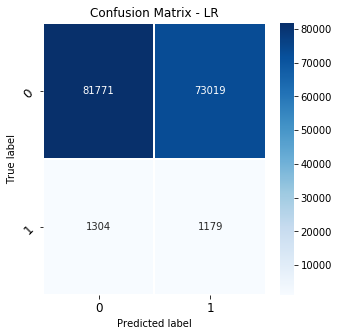

In [53]:
eval(best_model,X_test,y_test)

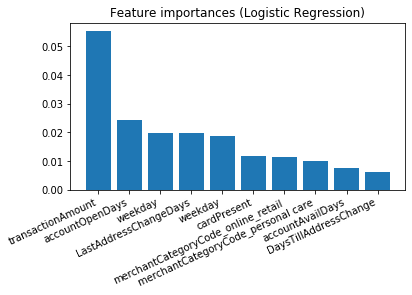

In [43]:
# feature importance
coefs = np.abs(best_model.best_estimator_.named_steps['logistic'].coef_[0])
indices = np.argsort(coefs)[::-1]
plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
    align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=25, ha='right')
plt.subplots_adjust(bottom=0.3)

#### Summary
- From the classification report, we see that the f1-score, which is the harmonious balanced mean measure of precision and recall, for class 0 is 0.69 - much higher than class 1 (0.03). It means the model did much better job predicting non-fraud compared to predicting fraud. Due to the class imbalance - fraud is only 1.6% of total records, the weighted average f1 score which considers the imabalance situation for two classes is okay - 0.68. 
- From the confusion matrix, the numbers on diagonals are the observations correctly predicted, which are what we want to be the highest number. However, in this case, not only the True Negatives are high, but also False Positives are extremely high, which is bad.
- Since the goal is to identify fraud, and most of the records are not fraud, it is better to identify less fraud than identifying all as fraud. In other words, type I errors we have here are very dangerous -  the high number of false positives are very bad sign.
- I think the problem might be I have excessively reduced the features, and led to the model learning from biased data. After feature selection step, I extracted the most significant encoded categorical features, those ones can share common trait of having higher fraud records which made the model learn in a biased way.  
- Next, I will fit model on training data w/o reducing features from feature selection step.

## fit model on training data w/o feature-reduction 
- This traning data is without feature selection. It includes all encoded features and engineered numerical features.
- 34 features for input, and 1 output variable


In [33]:
# fit model with training data for the full dataset

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_full, y_full, test_size=0.2,stratify=y_full)

model_all_features = LR.fit(X_train2,y_train2)
print(model_all_features.best_estimator_)
print(model_all_features.best_params_)

Pipeline(memory=None,
         steps=[('o',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy=0.1, svm_estimator='deprecated')),
                ('u',
                 RandomUnderSampler(random_state=None, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy=0.5)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penal

Best Threshold=0.387767, G-Mean=0.666
------------Classification report----------------
              precision    recall  f1-score   support

           0       0.99      0.71      0.83    154790
           1       0.03      0.62      0.06      2483

    accuracy                           0.71    157273
   macro avg       0.51      0.67      0.45    157273
weighted avg       0.98      0.71      0.82    157273

------------Confusion matrix---------------------


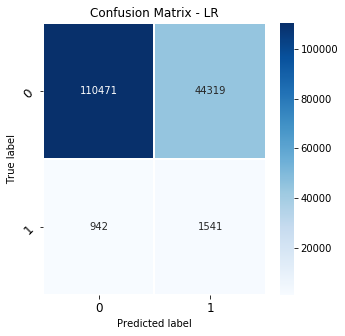

In [38]:
eval(model_all_features,X_test2,y_test2)

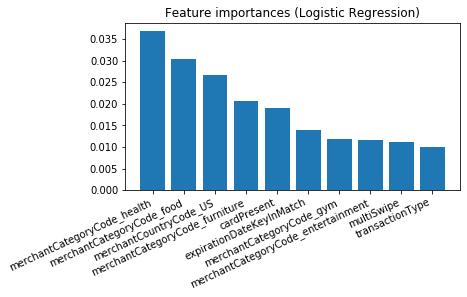

In [24]:
coefs2 = np.abs(model_all_features.best_estimator_.named_steps['logistic'].coef_[0])
indices = np.argsort(coefs2)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs2[indices[:10]],
    align="center")
plt.xticks(range(10),k, rotation=25, ha='right')
plt.subplots_adjust(bottom=0.3)

#### Summary
- From above, we confirm that the type I error (False Positives) dramatically reduced, and we see slight increase in True Positives, which is also a positive outcome. The weighted f1 score has increased from 0.68 to 0.82, which is also good.
- The weighted precision score is 0.98, much higher than recal 0.71, which is very ideal in this use case. Precision is a better measurement here because it returns the True Positives among all that identified as TP (fraud), which we need high accuracy, because we don't want to over-identify fraud records. Meanwhile, recall returns how many fraud records are correctly predicted, which we'd rather lose some accuracy on.
- The remaining biggest problem is still the extremely low precial score for class 1, which means the model can't predict the fraud records very correctly. Other than the work written below, the situation can also be improved by understanding the data better with the help of domain expertise. 


#### Future Improvments
- If I have more time and computation CPU power, I'd love to try penalized-SVM to balance the class weigts. 
- Also, I'd like to improve on the feature engineering part.  I'd like to try creating an embedding layer with a simple feedforward neural network to deal with categorical feature encoding problem. 
- There are also more hyperparameter tuning that can be done, for example, for the logistic regression ,I can try doing the bayesian optimization to improve the model performance.